<a href="https://colab.research.google.com/github/import-cj/JenkinsDemo/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1 EDA: Bank Dataset


Perform exploratory data analysis on the bank dataset. Question we are trying to answer is :

*   #### How age, job, marital affect the call duration spent with customer ?



## A. Importing Modules and Dataset

In [16]:
# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

All required modules loaded. Now we load the input dataset

In [17]:
# load data to pandas
df = pd.read_csv('/content/sample_data/bank.csv')

## B. Dataset Statistics


Lets have a look at the first and the last few data rows.

In [18]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [19]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


2000 rows with both numerical and categorical attributes totaling to 17 columns.

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (yes/no)

#### B.1. Quick Examination of Numerical Attributes

In [20]:
# Print statistical summary for all numerical attributes
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB
None


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Looking at the output. 
* `age` has 12 missing values.
* `job` has 10 missing values.
* `education` has 104 missing values.
* `contact` has 191 missing values.
* `poutcome` has 454 missing values.

Note that `day` has minimum 1 and maximum 31 meaning this is the day of the month contacted. We can also see entries with -1 for pdays which seems to be incorrect information.
There are missing values (NaN, empty cells) and incorrect data.

#### B.2. Quick Examination of Categorical Attributes

Lets see the statistics of categorical data

In [21]:
for column in df.columns:
  if df[column].dtype.name == 'object':
    print('-------------------------------------')
    print(column+": ")
    print('\n')
    print(df[column].value_counts())
    print('\n')

-------------------------------------
job: 


management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64


-------------------------------------
marital: 


married     1111
single       674
divorced     215
Name: marital, dtype: int64


-------------------------------------
education: 


secondary    995
tertiary     684
primary      217
Name: education, dtype: int64


-------------------------------------
default: 


no     1985
yes      15
Name: default, dtype: int64


-------------------------------------
housing: 


no     1037
yes     963
Name: housing, dtype: int64


-------------------------------------
loan: 


no     1750
yes     250
Name: loan, dtype: int64


-------------------------------------
contact: 


cellular     1663
telephone     146
Name: contact, dtype: int64


---------

Findings about the clients called:

* 50% have subscribed and 50% have not subscribed.
* more than 50% are employed and management, tech, bluecollar jobs are preferred.
* more than 50% are married
* more than 50% have education beyond primary level
* 99% are don't have credits defaulted
* almost 50% have housing
* almost 90% have no loans
* almost 93% were contacted over cellular
* majority clients are the ones that did'nt opt for previous campaign
* almost 50% call made during Jan,Feb,March,April months

## C. Plots and findings

> We try to plot simple and combined distributions totry and answer the question.



#### C.1. Simple Plots

Lets examine the numerical data first. The correlation matrix of all numerical attributes can be shown in the form of a **heat map**.

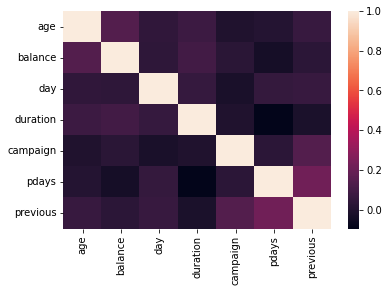

In [22]:
#correlation matrix
sns.heatmap(df.corr());

The heat map suggests correlation greater than 0 between `campaign` and the two attributes `pdays` and `previous`. Although, the most significant correlation is between `pdays` and `previous`. But these do not suggest any feasible relation.

We can further examine the pairwise distributions.

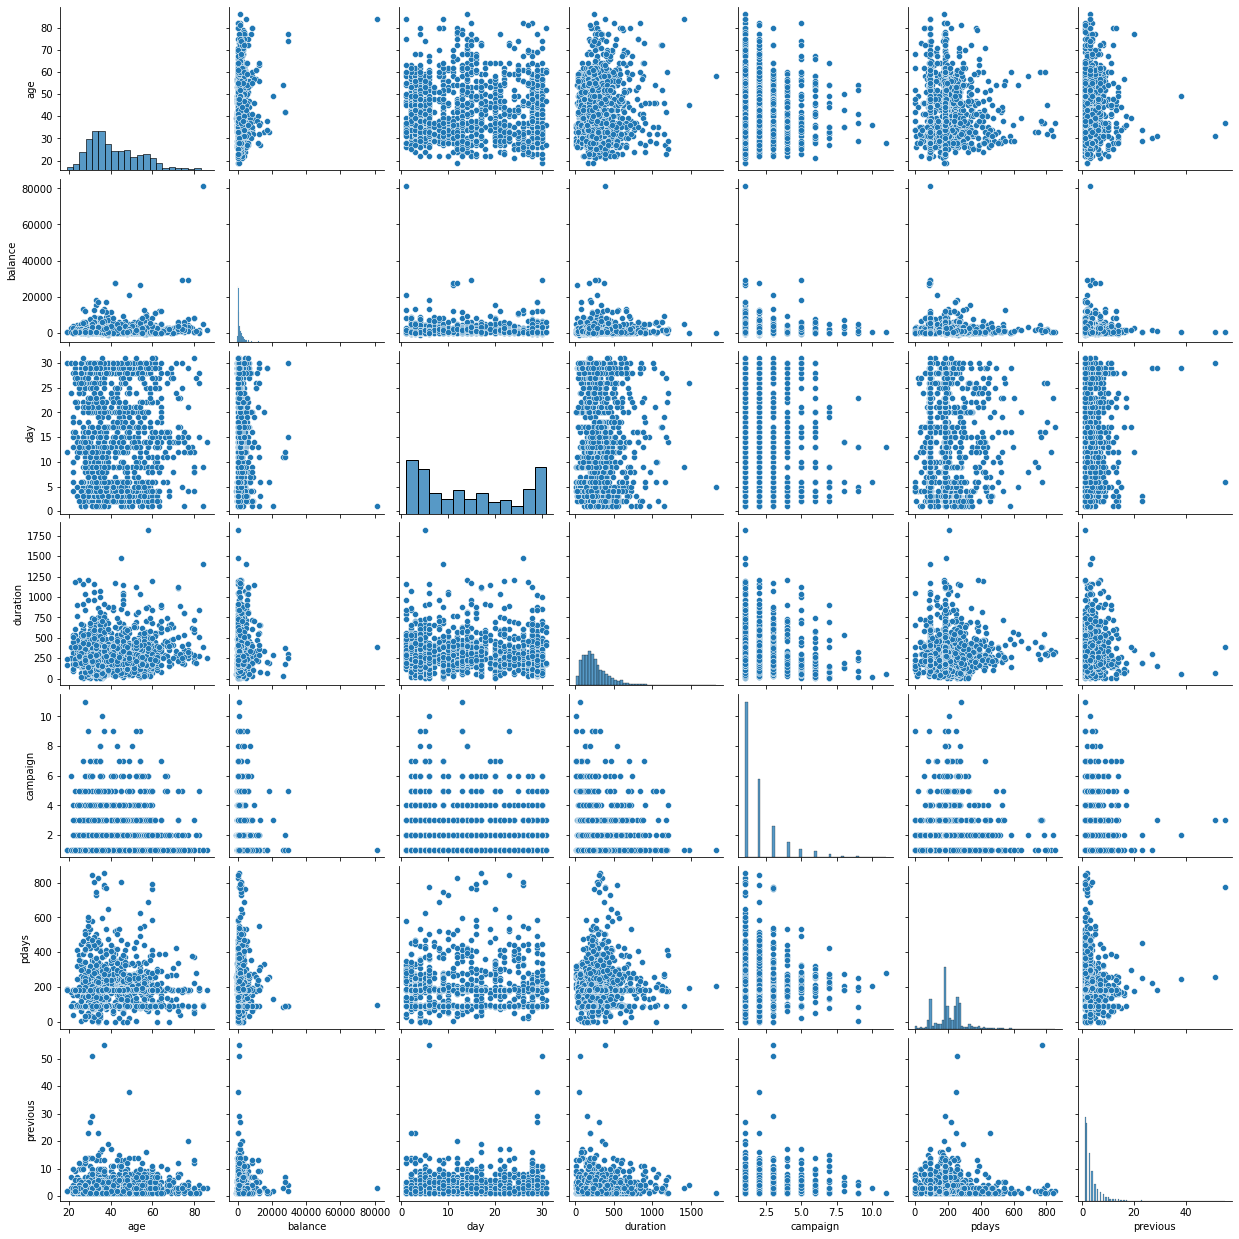

In [23]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(df.dropna())
plt.show()

We don't see much useful info here.

#### C.2. Combined Distribution Plots

Now that numerical data has been examined, let's have a look at combination of categorical and numerical data

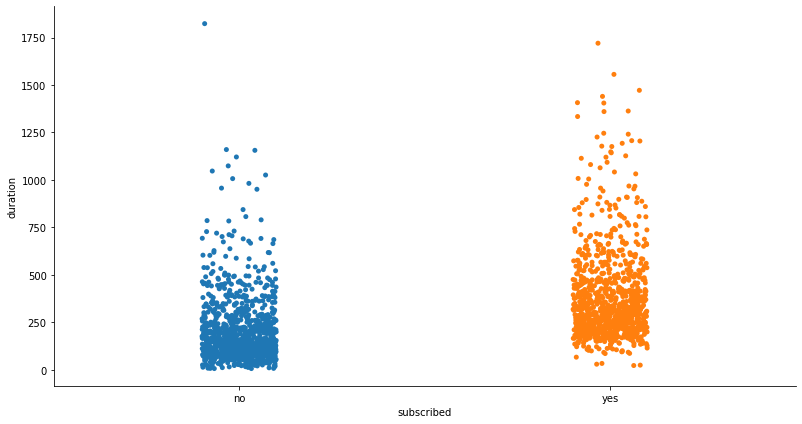

In [24]:
sns.catplot(x="subscribed", y="duration", data=df, height=6, aspect=15/8 )

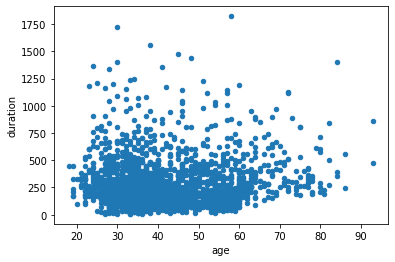

In [25]:
df.plot.scatter(x='age', y='duration')
plt.show()

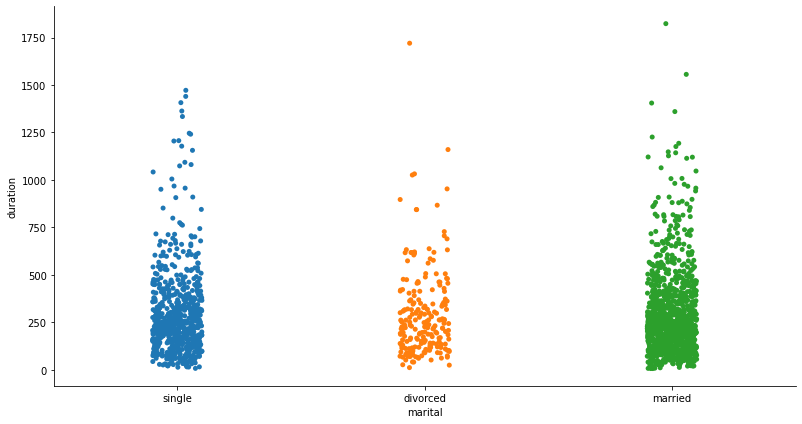

In [26]:
sns.catplot(x="marital", y="duration", data=df, height=6, aspect=15/8 )

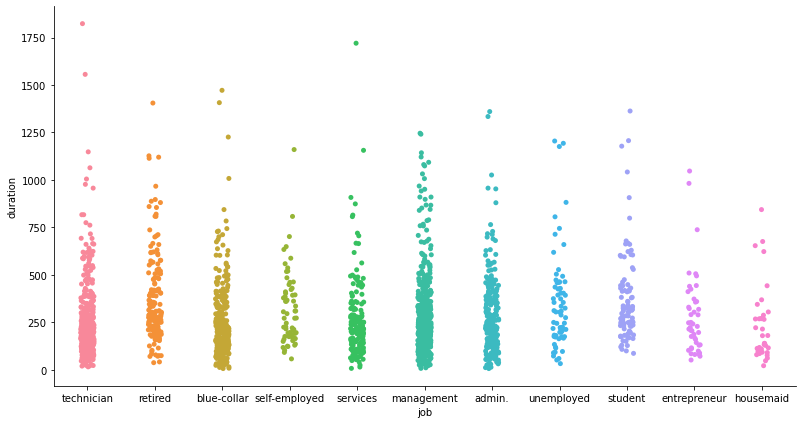

In [27]:
sns.catplot(x="job", y="duration", data=df, height=6, aspect=15/8 )

## D. Conclusion


We see that whether we consider age, subscription, relationship status the call duration for most calls is always around 500. If the subscribed answer was no then it was around 250. From this it could be argued that there was a call limit of 500 per callee set by the bank/call centre.